In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stats
from scipy import signal

from recordpulses import *
from playpulses import *
from calpulseperiod import *
from calpulseprofile import *
from caltemplate import *
from foldtimeseries import *
from correlate import *
from calmeasuredTOAs import *
from calexpectedTOAs import *
from calresiduals import *
from detrend import *
from errsinusoid import *
from calcorrcoeff import *
from corrvslag import *
from zeropadtimeseries import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# PTAdemo 0 - analyze reference metronome data files

# Record single metronome pulses

In [2]:
# filenames and beats per minute
metfile1 = 'm208a'
metfile2 = 'm184b'
metfiles = 'm208a184b'
bpm1 = 208
bpm2 = 184

In [3]:
# record pulses for metronome 1
#recordpulses(metfile1 + ".txt")

In [4]:
# record pulses for metronome 2
#recordpulses(metfile2 + ".txt")

# Play recorded pulses

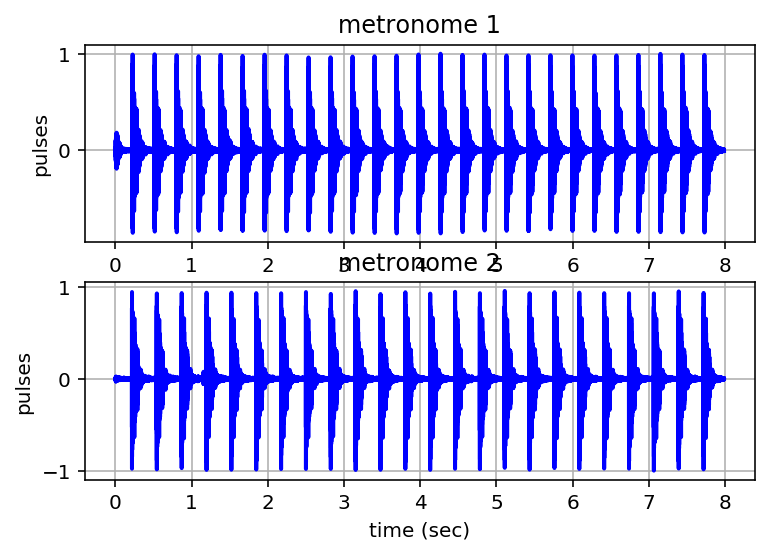

In [5]:
# sample rate
Fs = 22050

# play recorded sound
ts1 = playpulses(metfile1 + ".txt")
                                                        
# plot time series
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts1[:,0], ts1[:,1], lw=2, color='b')
plt.ylabel('pulses')
plt.title('metronome 1')
plt.grid('on')

# play recorded sound
ts2 = playpulses(metfile2 + ".txt")

# plot time series
plt.subplot(2,1,2)
plt.plot(ts2[:,0], ts2[:,1], lw=2, color='b')
plt.xlabel('time (sec)')
plt.ylabel('pulses')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "_pulses.pdf", bbox_inches='tight')

# calculate and plot pulse profiles

calculating pulse period and profile of metronome 1...
T1 =  0.288561538462 sec
calculating pulse period and profile of metronome 2...
T2 =  0.326096956522 sec


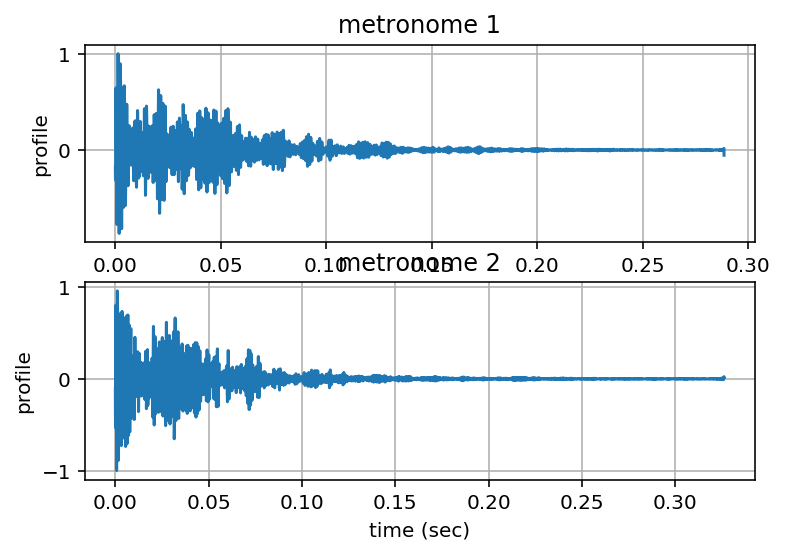

In [6]:
# metronome 1
print 'calculating pulse period and profile of metronome 1...'
[profile1, T1] = calpulseprofile(ts1, bpm1)
print 'T1 = ', T1, 'sec'

# plot pulse profile
plt.figure()
plt.subplot(2,1,1)
plt.plot(profile1[:,0], profile1[:,1])
plt.ylabel('profile')
plt.title('metronome 1')
plt.grid('on')

# write pulse profile to file
outfile1 = metfile1 + "_profile.txt"
np.savetxt(outfile1, profile1)

# metronome 2
print 'calculating pulse period and profile of metronome 2...'
[profile2, T2] = calpulseprofile(ts2, bpm2)
print 'T2 = ', T2, 'sec'

# plot pulse profile
plt.subplot(2,1,2)
plt.plot(profile2[:,0], profile2[:,1])
plt.xlabel('time (sec)')
plt.ylabel('profile')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# write pulse profile to file
outfile2 = metfile2 + "_profile.txt"
np.savetxt(outfile2, profile2)

# print to file
plt.savefig(metfiles + "_profiles.pdf", bbox_inches='tight')

# zoom-in on profiles

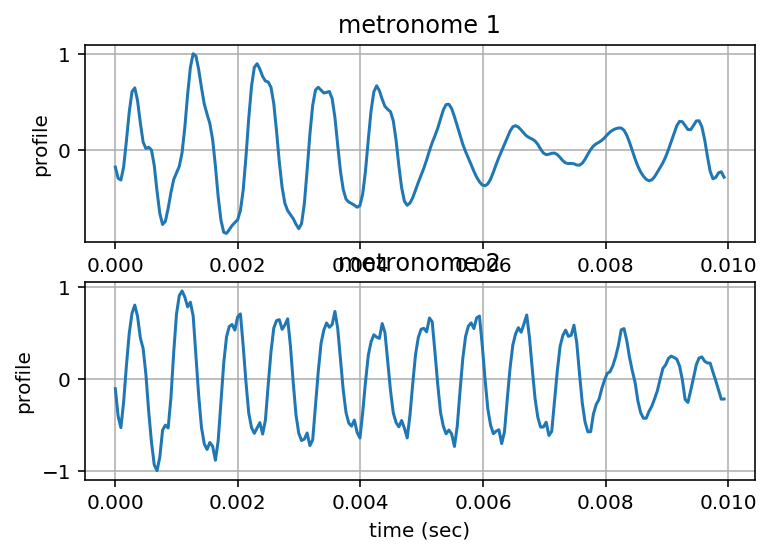

In [7]:
Nzoom = np.int(np.round(0.01*Fs))

plt.figure()
plt.subplot(2,1,1)
plt.plot(profile1[:Nzoom,0], profile1[:Nzoom,1])
plt.ylabel('profile')
plt.title('metronome 1')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(profile2[:Nzoom,0], profile2[:Nzoom,1])
plt.xlabel('time (sec)')
plt.ylabel('profile')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "_profiles_zoom.pdf", bbox_inches='tight')

# calculate residuals

In [8]:
# calculate residuals for metronome 1
template1 = caltemplate(profile1, ts1)
[measuredTOAs1, uncertainties1, n01] = calmeasuredTOAs(ts1, template1, T1)
Np1 = len(measuredTOAs1)
expectedTOAs1 = calexpectedTOAs(measuredTOAs1[n01-1], n01, Np1, T1)
[residuals1, errorbars1] = calresiduals(measuredTOAs1, expectedTOAs1, uncertainties1)

# calculate residuals for metronome 2
template2 = caltemplate(profile2, ts2)
[measuredTOAs2, uncertainties2, n02] = calmeasuredTOAs(ts2, template2, T2)
Np2 = len(measuredTOAs2)
expectedTOAs2 = calexpectedTOAs(measuredTOAs2[n02-1], n02, Np2, T2)
[residuals2, errorbars2] = calresiduals(measuredTOAs2, expectedTOAs2, uncertainties2)

calculating reference TOA
reference TOA (n= 3 ) has correlation= 0.969237711201
calculating TOA 1
calculating TOA 2
calculating TOA 3
calculating TOA 4
calculating TOA 5
calculating TOA 6
calculating TOA 7
calculating TOA 8
calculating TOA 9
calculating TOA 10
calculating TOA 11
calculating TOA 12
calculating TOA 13
calculating TOA 14
calculating TOA 15
calculating TOA 16
calculating TOA 17
calculating TOA 18
calculating TOA 19
calculating TOA 20
calculating TOA 21
calculating TOA 22
calculating TOA 23
calculating TOA 24
calculating TOA 25
calculating TOA 26
calculating TOA 27
calculating reference TOA
reference TOA (n= 10 ) has correlation= 0.988924675784
calculating TOA 1
calculating TOA 2
calculating TOA 3
calculating TOA 4
calculating TOA 5
calculating TOA 6
calculating TOA 7
calculating TOA 8
calculating TOA 9
calculating TOA 10
calculating TOA 11
calculating TOA 12
calculating TOA 13
calculating TOA 14
calculating TOA 15
calculating TOA 16
calculating TOA 17
calculating TOA 18
ca

# plot residuals

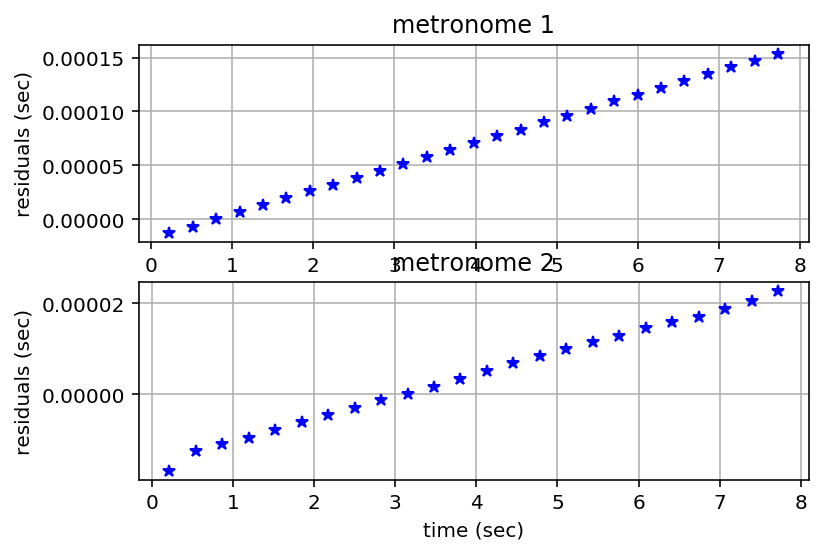

In [9]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(residuals1[:,0], residuals1[:,1], 'b*');
plt.ylabel('residuals (sec)')
plt.title('metronome 1')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(residuals2[:,0], residuals2[:,1], 'b*');
plt.xlabel('time (sec)')
plt.ylabel('residuals (sec)')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "_residuals.pdf", bbox_inches='tight')

# calculate and plot detrended residuals

improved pulse period estimate of metronome 1 = 0.288567978601 sec
improved pulse period estimate of metronome 2 = 0.32609882891 sec


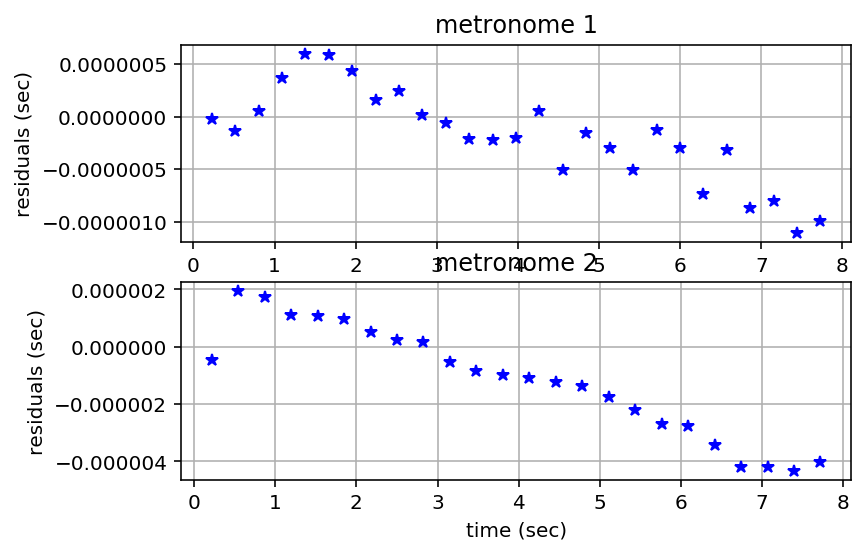

In [10]:
[dtresiduals1, b, m] = detrend(residuals1, errorbars1);
N1 = len(residuals1[:,0])
T1new = T1 + m*(residuals1[-1,0]-residuals1[0,0])/(N1-1)
print "improved pulse period estimate of metronome 1 =", T1new, "sec"

[dtresiduals2, b, m] = detrend(residuals2, errorbars2);
N2 = len(residuals2[:,0])
T2new = T2 + m*(residuals2[-1,0]-residuals2[0,0])/(N2-1)
print "improved pulse period estimate of metronome 2 =", T2new, "sec"

# plot residuals
plt.figure()
plt.subplot(2,1,1)
plt.plot(dtresiduals1[:,0], dtresiduals1[:,1], 'b*');
plt.ylabel('residuals (sec)')
plt.title('metronome 1')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(dtresiduals2[:,0], dtresiduals2[:,1], 'b*');
plt.xlabel('time (sec)')
plt.ylabel('residuals (sec)')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "detrended_residuals.pdf", bbox_inches='tight')


# PTAdemo 2 - for double metronome data files

# record double-metronome data

In [11]:
# filenames (time-series and pulse profiles)
tsfile = 'm208a184b135'
profilefile1 = 'm208a_profile'
profilefile2 = 'm184b_profile'
T1 = T1new
T2 = T2new

In [12]:
# record pulses from both metronomes
#recordpulses(tsfile + ".txt")

# play recorded pulses

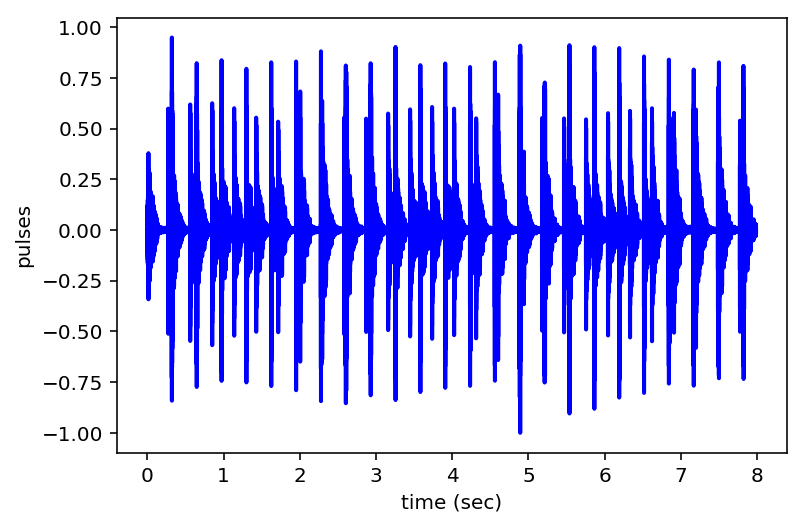

In [13]:
# play recorded sound
ts = playpulses(tsfile + ".txt")
                                                        
# plot time series
plt.figure()
plt.plot(ts[:,0], ts[:,1], lw=2, color='b')
plt.xlabel('time (sec)');
plt.ylabel('pulses');
plt.grid
plt.draw()

# print to file
plt.savefig(tsfile + "_pulses.pdf", bbox_inches='tight')

# calculate residuals

In [14]:
# load pulse profiles
profile1 = np.loadtxt(profilefile1 + ".txt")
profile2 = np.loadtxt(profilefile2 + ".txt")

# calculate residuals for metronome 1
template1 = caltemplate(profile1, ts)
[measuredTOAs1, uncertainties1, n01] = calmeasuredTOAs(ts, template1, T1)
Np1 = len(measuredTOAs1)
expectedTOAs1 = calexpectedTOAs(measuredTOAs1[n01-1], n01, Np1, T1)
[residuals1, errorbars1] = calresiduals(measuredTOAs1, expectedTOAs1, uncertainties1)

# calculate residuals for metronome 2
template2 = caltemplate(profile2, ts)
[measuredTOAs2, uncertainties2, n02] = calmeasuredTOAs(ts, template2, T2)
Np2 = len(measuredTOAs2)
expectedTOAs2 = calexpectedTOAs(measuredTOAs2[n02-1], n02, Np2, T2)
[residuals2, errorbars2] = calresiduals(measuredTOAs2, expectedTOAs2, uncertainties2)

calculating reference TOA
reference TOA (n= 17 ) has correlation= 0.420626247549
calculating TOA 1
calculating TOA 2
calculating TOA 3
calculating TOA 4
calculating TOA 5
calculating TOA 6
calculating TOA 7
calculating TOA 8
calculating TOA 9
calculating TOA 10
calculating TOA 11
calculating TOA 12
calculating TOA 13
calculating TOA 14
calculating TOA 15
calculating TOA 16
calculating TOA 17
calculating TOA 18
calculating TOA 19
calculating TOA 20
calculating TOA 21
calculating TOA 22
calculating TOA 23
calculating TOA 24
calculating TOA 25
calculating TOA 26
calculating TOA 27
calculating reference TOA
reference TOA (n= 17 ) has correlation= 0.37735929133
calculating TOA 1
calculating TOA 2
calculating TOA 3
calculating TOA 4
calculating TOA 5
calculating TOA 6
calculating TOA 7
calculating TOA 8
calculating TOA 9
calculating TOA 10
calculating TOA 11
calculating TOA 12
calculating TOA 13
calculating TOA 14
calculating TOA 15
calculating TOA 16
calculating TOA 17
calculating TOA 18
ca

# plot residuals

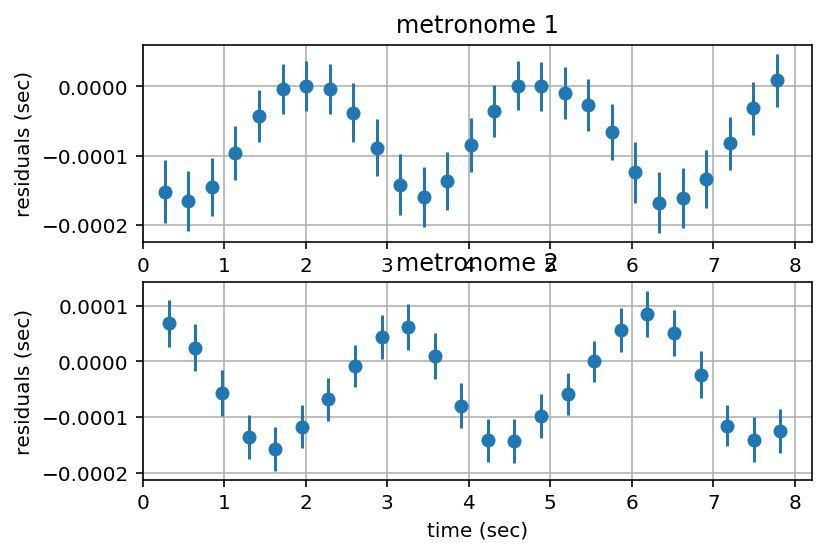

In [15]:
tlim = 1.05*max(residuals1[-1,0],residuals2[-1,0])

plt.figure()
plt.subplot(2,1,1)
plt.errorbar(residuals1[:,0], residuals1[:,1], errorbars1[:,1], fmt='o')
plt.xlim(0, tlim)
plt.ylabel('residuals (sec)')
plt.title('metronome 1')
plt.grid('on')

plt.subplot(2,1,2)
plt.errorbar(residuals2[:,0], residuals2[:,1], errorbars2[:,1], fmt='o')
plt.xlim(0, tlim)
plt.xlabel('time (sec)')
plt.ylabel('residuals (sec)')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# fit sinusoid with constant offset to residuals, then plot

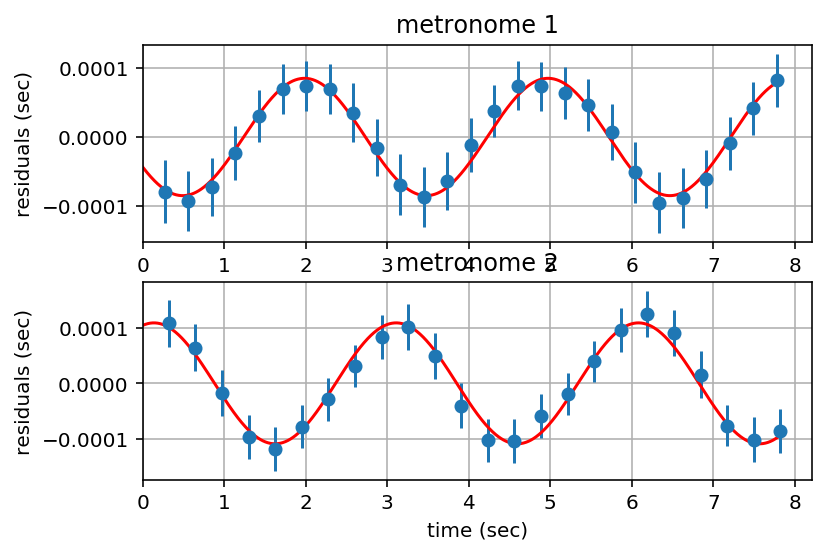

In [16]:
# default parameter choices
p1 = 2e-4
p2 = 0.4
p3 = 0
p4 = 0

#p1, p2, p3, p4  = input('input guess for amplitude, freq (Hz), phase (rad), offset (sec) for metronome 1: ')
pars1 = np.zeros(4)
pars1[0] = p1
pars1[1] = p2
pars1[2] = p3
pars1[3] = p4

pfit1, pcov1, infodict, message, ier = opt.leastsq(errsinusoid, pars1, args=(residuals1[:,0], residuals1[:,1], errorbars1[:,1]), full_output=1)

# default parameter choices
p1 = 2e-4
p2 = 0.4
p3 = 0
p4 = 0

#p1, p2, p3, p4  = input('input guess for amplitude, freq (Hz), phase (rad), offset (sec) for metronome 2: ')
pars2 = np.zeros(4)
pars2[0] = p1
pars2[1] = p2
pars2[2] = p3
pars2[3] = p4

pfit2, pcov2, infodict, message, ier = opt.leastsq(errsinusoid, pars2, args=(residuals2[:,0], residuals2[:,1], errorbars2[:,1]), full_output=1)

# best fit sinusoids
tfit = np.linspace(0, max(residuals1[-1,0], residuals2[-1,0]), 1024)
yfit1 = pfit1[0]*np.sin(2*np.pi*pfit1[1]*tfit + pfit1[2])
yfit2 = pfit2[0]*np.sin(2*np.pi*pfit2[1]*tfit + pfit2[2])

# constant offsets
N1 = len(residuals1[:,0])
N2 = len(residuals2[:,0])
offset1 = pfit1[3]*np.ones(N1)
offset2 = pfit2[3]*np.ones(N2)

# plot residuals with constants removed and with best fit sinusoids
plt.figure()
plt.subplot(2,1,1)
plt.errorbar(residuals1[:,0], residuals1[:,1]-offset1, errorbars1[:,1], fmt='o')
plt.plot(tfit, yfit1, 'r-')
plt.xlim(0, tlim)
plt.ylabel('residuals (sec)')
plt.title('metronome 1')
plt.grid('on')

plt.subplot(2,1,2)
plt.errorbar(residuals2[:,0], residuals2[:,1]-offset2, errorbars2[:,1], fmt='o')
plt.plot(tfit, yfit2, 'r-')
plt.xlim(0, tlim)
plt.xlabel('time (sec)')
plt.ylabel('residuals (sec)')
plt.title('metronome 2')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(tsfile + "_residuals.pdf", bbox_inches='tight')

# calculate correlation coefficient

In [17]:
rhox, rhoy, rhoxy = calcorrcoeff(yfit1, yfit2)
print 'correlation coeff = ', rhoxy

correlation coeff =  -0.724534807671
